In [43]:
# おまじない
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from olrprobust_2 import olrp,olrprobust,doubleo

In [45]:
import numpy as np
import pandas as pd

パラメータの設定

In [46]:
#本書に記載のなかった変数
b = 1000.
mu_d = 200.
c_d = .7
rho = .7
sig = -10.

In [47]:
beta = 0.9971
R_kinri = 1 / beta
A = np.array([[1., 0., 0.], [-b, R_kinri, 1.], [(1. - rho) * mu_d, 0., rho]])
B = np.array([[0.], [1.], [0.]])
C = np.array([[0.], [0.], [c_d]])

matlabの解説にはこう書いてあった。  
%function[F,K,P,Pt]=olrprobust(beta,A,B,C,Q,R,sig)  
% Solves the robust control problem  
%  
%  min sum beta^t(x'Qx + u'R u) for the state space system  

従ってQとRを以下に調整。overleafとは逆に設定する。

In [48]:
Q = np.zeros((3, 3))
# R_hyouka = 0
R_hyouka = np.array([[1]])

In [49]:
F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)

sig = -10.0
val =0.099710
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -4.9   ]]


In [50]:
print(F[0,1])
#print(np.zeros(1,1))

0.0


In [51]:
iter = 1000
sig = -0.1
tmp_F0= []
tmp_F1= []
tmp_F2= []
tmp_sig = []

for i in range(iter):
    F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    tmp_F0.append(-F[0,0])
    tmp_F1.append(-F[0,1])
    tmp_F2.append(-F[0,2])
    tmp_sig.append(sig)
    sig -= 0.1

#print(tmp_F)

sig = -0.1


val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.049 ]]
sig = -0.2
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.098 ]]
sig = -0.30000000000000004
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.147 ]]
sig = -0.4
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.196 ]]
sig = -0.5
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.245 ]]
sig = -0.6
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.294 ]]
sig = -0.7
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0

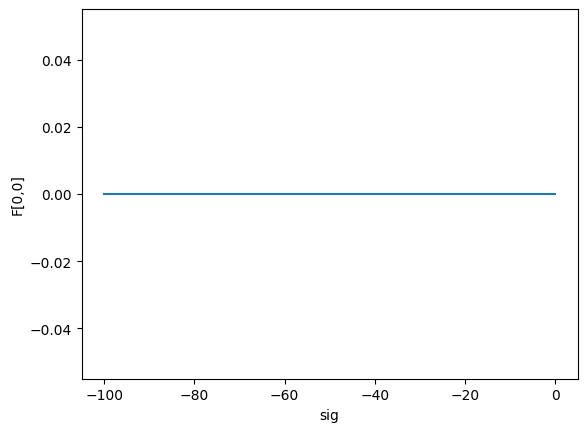

In [52]:
import matplotlib.pyplot as plt

#pd.plotting.register_matplotlib_converters()


plt.figure()

plt.vlines(-10,min(tmp_F0),max(tmp_F0))
plt.xlabel("sig")
plt.ylabel("F[0,0]")
plt.plot(tmp_sig,tmp_F0)
plt.savefig("../F0")


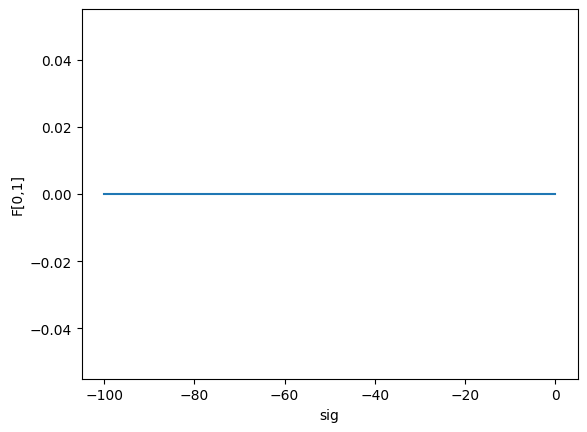

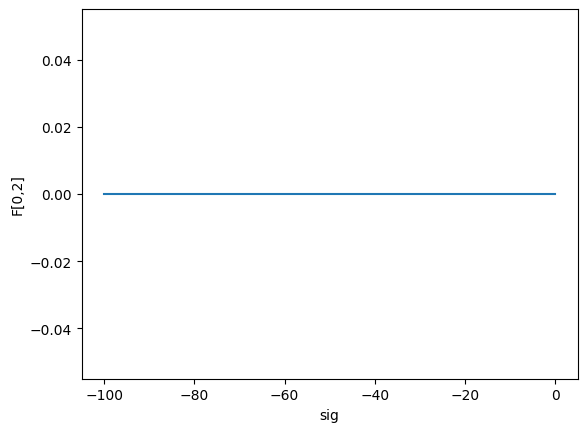

In [53]:

plt.figure()
plt.vlines(-10,min(tmp_F1),max(tmp_F1))
plt.xlabel("sig")
plt.ylabel("F[0,1]")
plt.plot(tmp_sig,tmp_F1)
plt.savefig("../F1")

plt.figure()
plt.vlines(-10,min(tmp_F2),max(tmp_F2))
plt.xlabel("sig")
plt.ylabel("F[0,2]")
plt.plot(tmp_sig,tmp_F2)
plt.savefig("../F2")

初期値を変えてやってみよう

In [54]:
#本書に記載のなかった変数
b = 20.0
mu_d = 18.0
c_d = .8
rho = 0.2
sig = -10.0


In [55]:
beta = 0.9971
R_kinri = 1 / beta
A = np.array([[1., 0., 0.], [-b, R_kinri, 1.], [(1. - rho) * mu_d, 0., rho]])
B = np.array([[0.], [1.], [0.]])
C = np.array([[0.], [0.], [c_d]])

In [56]:
Q = np.zeros((3, 3))
# R_hyouka = 0
R_hyouka = np.array([[1]])

In [57]:
iter = 1000
sig = -0.1
tmp_F0= []
tmp_F1= []
tmp_F2= []
tmp_sig = []

for i in range(iter):
    F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    #print(F)
    tmp_F0.append(-F[0,0])
    tmp_F1.append(-F[0,1])
    tmp_F2.append(-F[0,2])
    tmp_sig.append(sig)
    sig -= 0.1

sig = -0.1
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.064 ]]
sig = -0.2
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.128 ]]
sig = -0.30000000000000004
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.192 ]]
sig = -0.4
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.256 ]]
sig = -0.5
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.32  ]]
sig = -0.6
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.      0.9971  0.    ]
 [ 0.      0.     -0.384 ]]
sig = -0.7
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.      0.      0.    ]
 [ 0.     

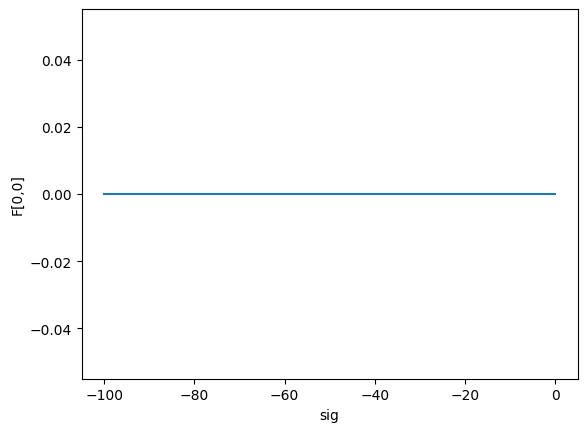

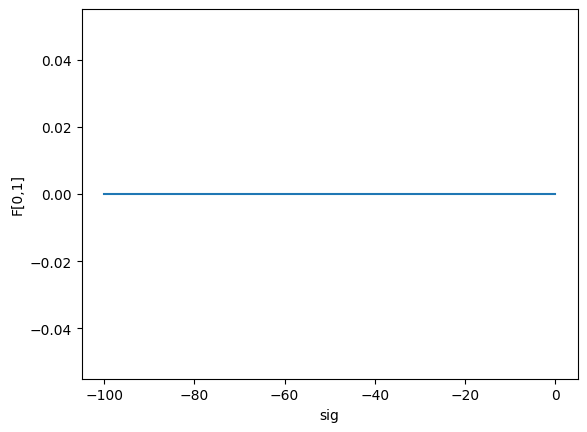

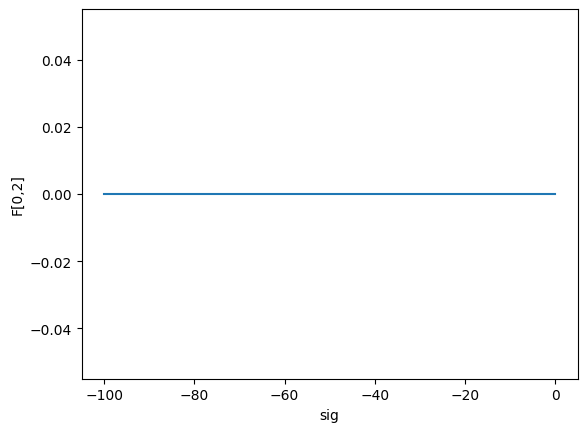

In [58]:
import matplotlib.pyplot as plt

plt.figure()

plt.vlines(-10,min(tmp_F0),max(tmp_F0))
plt.xlabel("sig")
plt.ylabel("F[0,0]")
plt.plot(tmp_sig,tmp_F0)
plt.savefig("../F0_1.png")


plt.figure()
plt.vlines(-10,min(tmp_F1),max(tmp_F1))
plt.xlabel("sig")
plt.ylabel("F[0,1]")
plt.plot(tmp_sig,tmp_F1)
plt.savefig("../F1_1.png")


plt.figure()
plt.vlines(-10,min(tmp_F2),max(tmp_F2))
plt.xlabel("sig")
plt.ylabel("F[0,2]")
plt.plot(tmp_sig,tmp_F2)
plt.savefig("../F2_1.png")


まとめてやってみよう

In [59]:
b = 20.0
mu_d = 18.0
c_d = .8
rho = 0.01
sig = -10.0


beta = 0.95
R_kinri = 1 / beta
Q = np.zeros((3, 3))
A = np.array([[1.0, 0.0, 0.0], [-b, R_kinri, 1.0], [(1.0 - rho) * mu_d, 0.0, rho]])
B = np.array([[0.0], [1.0], [0.0]])
C = np.array([[0.0], [0.0], [c_d]])

iter_t = 100
iter_arr = [-0.1, -10, -20, -30, -40]
d_0 = 0
y = np.zeros((1, 3))

for sig in iter_arr:
    # print(y)
    y = np.insert(y, 0, np.array([1, 0, d_0]), axis=0)
    F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
    Tmp = A - np.dot(B, F) + np.dot(C, K)
    for i in range(iter_t):
        # print(i)
        # F, K, P, Pt = olrprobust(beta, A, B, C, Q, R_hyouka, sig)
        # Tmp = A -np.dot(B,F) + np.dot(C,K)
        # print(Tmp)
        y = np.insert(y, 0, np.dot(Tmp, y[0].T), axis=0)

k_get = y[:, 1]
d_get = y[:, 2]
k_get = k_get[::-1]
d_get = d_get[::-1]
x = np.array(range(iter_t + 1))

sig = -0.1
val =1.000000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.     0.     0.   ]
 [ 0.     0.95   0.   ]
 [ 0.     0.    -0.064]]
sig = -10
val =0.095000
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[ 0.    0.    0.  ]
 [ 0.    0.95  0.  ]
 [ 0.    0.   -6.4 ]]
sig = -20
val =0.047500
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[  0.     0.     0.  ]
 [  0.     0.95   0.  ]
 [  0.     0.   -12.8 ]]
sig = -30
val =0.031667
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[  0.     0.     0.  ]
 [  0.     0.95   0.  ]
 [  0.     0.   -19.2 ]]
sig = -40
val =0.023750
in np.min(np.abs(eig(R)[0])) > 1e-5
b0 =[[  0.     0.     0.  ]
 [  0.     0.95   0.  ]
 [  0.     0.   -25.6 ]]


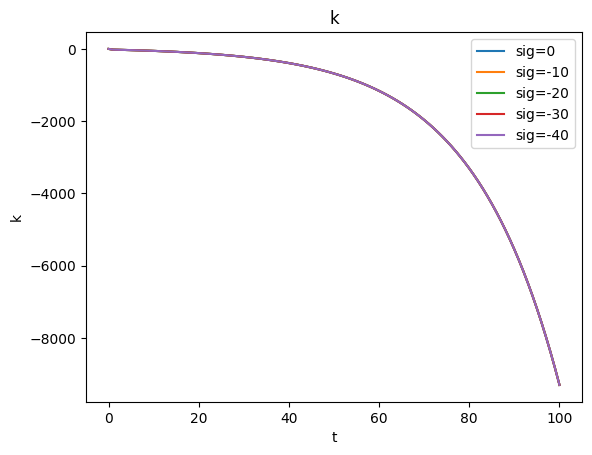

In [60]:
plt.figure()
plt.xlabel("t")
plt.ylabel("k")
plt.title("k")
for where, sig in enumerate(iter_arr):
   
    plt.plot(
        x,
        k_get[(iter_t + 1) * where + 1 : (iter_t + 1) * where + 1 + iter_t + 1],
        label="sig=%d" % sig,
    )
    plt.legend(prop={"size": 10})
plt.savefig("..\k_kuri")

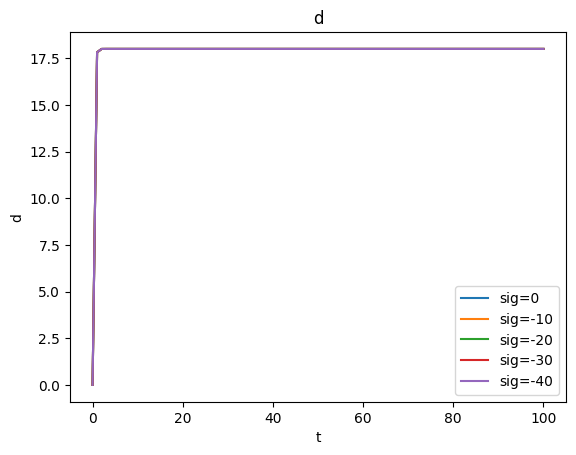

In [61]:
plt.figure()
plt.xlabel("t")
plt.ylabel("d")
plt.title("d")
for where, sig in enumerate(iter_arr):
   
    plt.plot(
        x,
        d_get[(iter_t + 1) * where + 1 : (iter_t + 1) * where + 1 + iter_t + 1],
        label="sig=%d" % sig,
    )
    plt.legend(prop={"size": 10})
plt.savefig("..\c_kuri")

Cを観察したい。

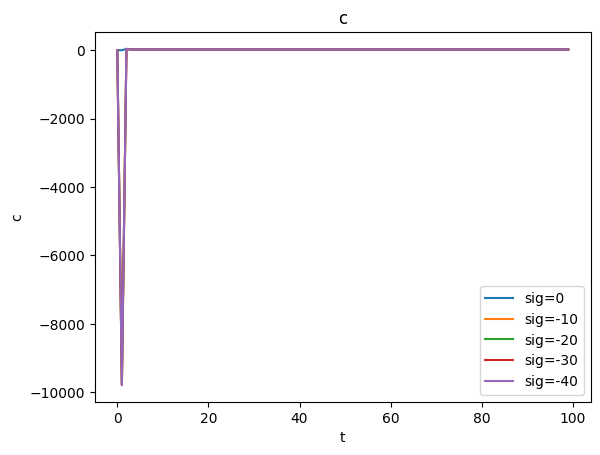

In [62]:
plt.figure()
plt.xlabel("t")
plt.ylabel("c")
plt.title("c")
for where, sig in enumerate(iter_arr):
    c = np.zeros(iter_t)
    for i in range(1, iter_t):
        c[i] = R_kinri * k_get[(iter_t + 1) * where + i -1] + d_get[(iter_t + 1) * where + i] - k_get[(iter_t + 1) * where + i]
    plt.plot(
        x[0:iter_t],
        c,
        label="sig=%d" % sig,
    )
    plt.legend(prop={"size": 10})
plt.savefig("..\d_kuri")

全部を一枚に

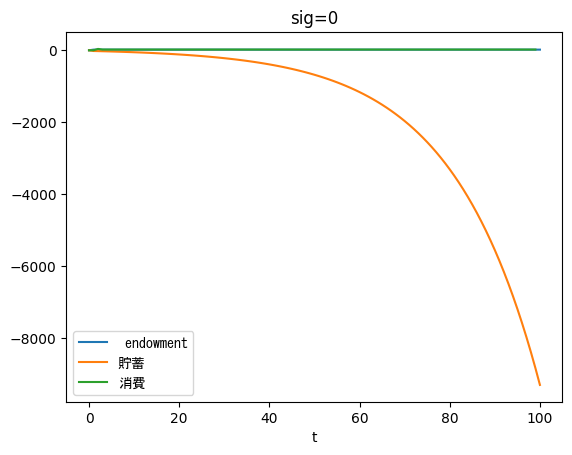

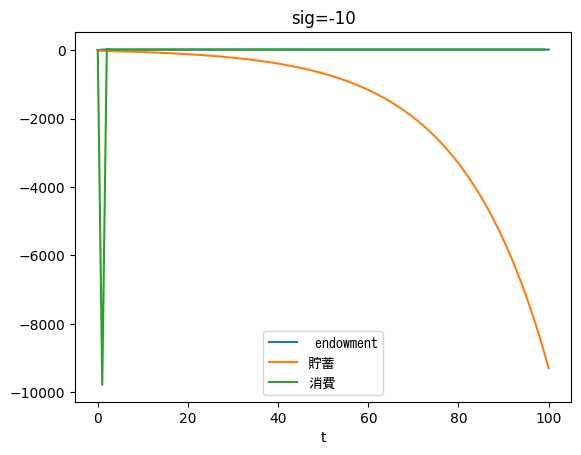

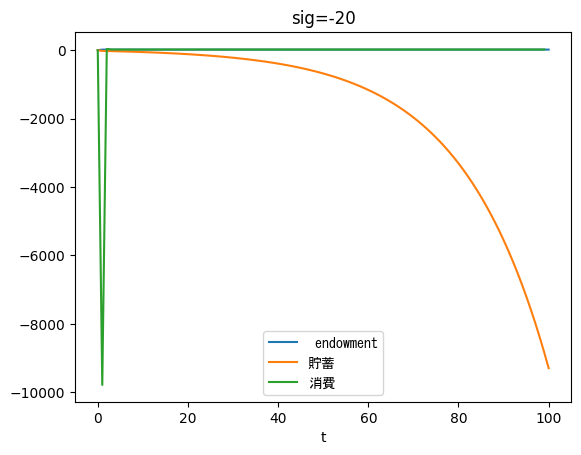

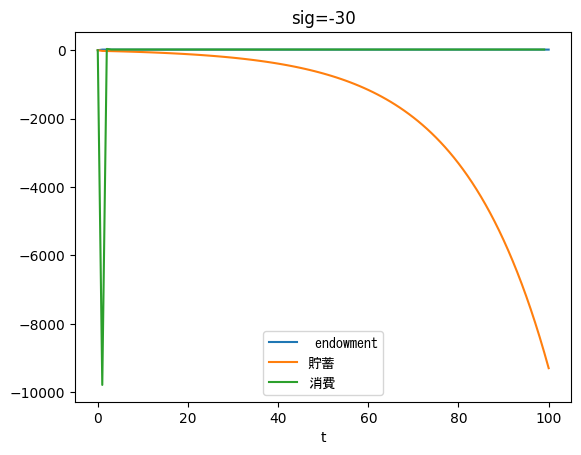

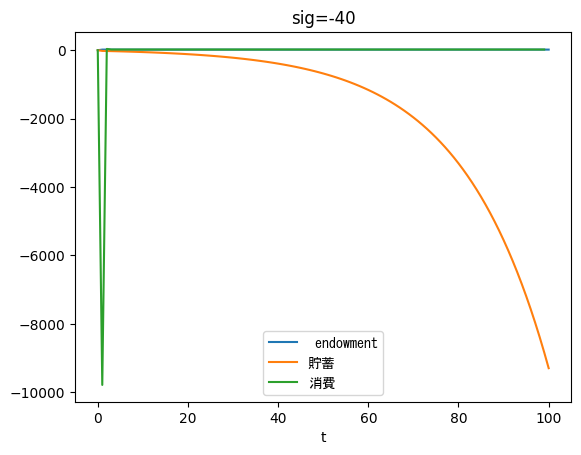

In [63]:

for where, sig in enumerate(iter_arr):
    plt.figure()
    plt.xlabel("t")
    #plt.ylabel("d")
    plt.title("sig=%d"%sig)
    plt.plot(
        x,
        d_get[(iter_t + 1) * where + 1 : (iter_t + 1) * where + 1 + iter_t + 1],
        label=" endowment",
    )
    plt.plot(
        x,
        k_get[(iter_t + 1) * where + 1 : (iter_t + 1) * where + 1 + iter_t + 1],
        label="貯蓄"
    )
    c = np.zeros(iter_t)
    for i in range(1, iter_t):
        c[i] = R_kinri * k_get[(iter_t + 1) * where + i -1] + d_get[(iter_t + 1) * where + i] - k_get[(iter_t + 1) * where + i]
    plt.plot(
        x[0:iter_t],
        c,
        label="消費"
    )
    plt.legend(prop={"size": 10,"family":"MS Gothic"})
    plt.savefig("..\ll_kuri")